In [ ]:
#import all the necessary libraries import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# mount file on drive in colab
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/House price prediction model/MagicBricks.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#access the file
df=pd.read_csv(path)

In [ ]:
#gather information about the data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [ ]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [ ]:
#Data Cleaning
#missing values
print(df.isnull().sum())

# Drop rows with missing target values
df.dropna(subset=['Price'], inplace=True)



Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64


<Axes: xlabel='BHK', ylabel='count'>

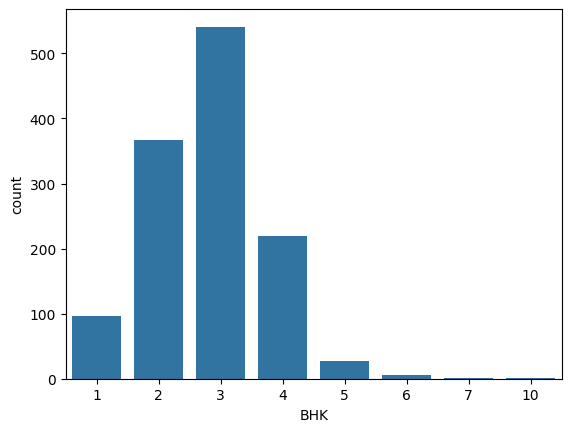

In [ ]:
#Finding outliers
sns.countplot(x='BHK', data=df)

In [ ]:
df['BHK'].value_counts()

BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64

In [ ]:
#identified rows to drop
df.drop([721,345,163,164,261,352,353,585],inplace=True)


<Axes: xlabel='Bathroom', ylabel='count'>

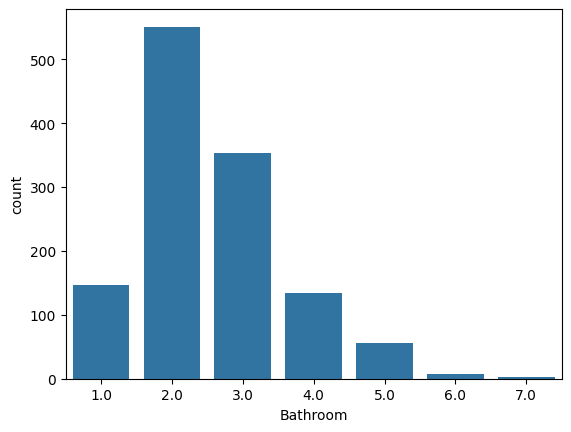

In [ ]:
#Finding outliers
sns.countplot(x='Bathroom', data=df)

In [ ]:
df.drop([225,495,527,659,676,681,1211,248,1029],inplace=True)

In [ ]:
df.Parking.fillna(0,inplace=True)

<Axes: xlabel='Parking', ylabel='count'>

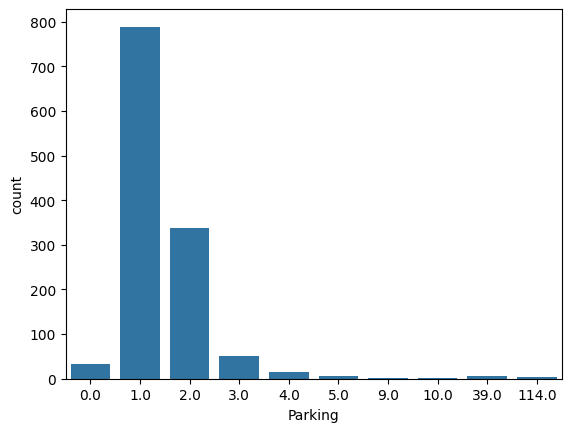

In [ ]:
#Finding outliers
sns.countplot(x='Parking', data=df)

In [ ]:
df['Parking'].replace([39,114],1,inplace=True)
df['Parking'].replace([5,9,10],4,inplace=True)

In [ ]:
#area and price related so per sq ft not needed
df.drop('Per_Sqft',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
dtype: int64

In [ ]:
#null imputations reqd
df.Bathroom.fillna(df.Bathroom.median(),inplace=True)
df.Type.fillna('Apartment',inplace=True)
df.Furnishing.fillna('Semi-Furnished',inplace=True)

In [ ]:
df.drop('Locality',axis=1,inplace=True)

In [ ]:
#onehotencoding
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Furnishing_Furnished',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'Status_Almost_ready', 'Status_Ready_to_move',
       'Transaction_New_Property', 'Transaction_Resale', 'Type_Apartment',
       'Type_Builder_Floor'],
      dtype='object')

In [ ]:
df = df.astype(float)

In [ ]:
for col in df.columns:
    m = max(df[col])
    df[col] = df[col]/m

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0052918824038780034
R-squared: 0.5199355948714558


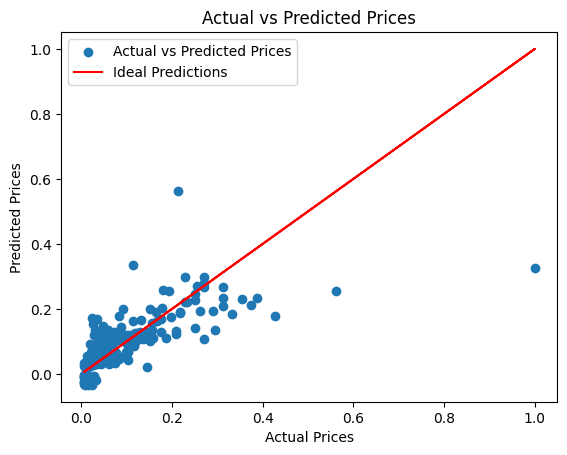

In [ ]:
plt.scatter(y_test, y_pred, marker='o', label='Actual vs Predicted Prices')
plt.plot(y_test, y_test, color='r', label='Ideal Predictions')  # plot the ideal line where actual = predicted
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()